# Informe Final de Carrera

### Punto de partida

Elegi el proyecto 1 y 2 para continuar y realizar el informe final de la carrera, a continuacion me basaré en el desempeño del proyecto anterior realizando los cambios necesarios para contestar a la nueva problematica

### Nuevo desafio

¿Se puede determinar que tipo de propiedad es un inmuble teniendo en cuenta los datos dados? <br>
Me parece importante este punto ya que para los tipos de inmuble el dataset esta muy desbalanceado, contando con muchos departamentos, algunas casas y PH y pocas cocheras, lotes, oficinas, etc. Es muy comun que en problemas reales me encuentre con datasets desbalanceados, ya que no siempre hay mucha informacion de todo. Por lo tanto, elegi esta problematica para poder determinar cuales son las formas y metodos que se tiene para poder trabajar con un dataset desbalanceado.

### Repositorio: https://github.com/micazeballos/DS_Proyecto_Final

### Analisis exploratorio de datos

Para empezar voy a importar las librerias, inicializar nuevamente el Dataset y luego realizare algunas transformaciones de datos para obtener mejores resultados.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set()
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, plot_confusion_matrix,classification_report
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter

In [2]:
# SE DEBE MODIFICAR EL PATH PARA PODER EJECUTARLO
data = pd.read_csv("C:/Users/Usuario/Documents/DATA SCIENCE/DATA SETS/DS_Proyecto_01_Datos_Properati.csv")

In [3]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
data['property_type'].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Para los valores de lote, oficina, local comercial, casa de campo, deposito y cochera lo integrare a la categoria otro ya que son valores muy pequeños



In [5]:
data_filtro = data.copy()
data_filtro.shape

(146660, 19)

In [6]:
data_filtro['property_type'] =  data_filtro['property_type'].map({'Lote': 'Otro',
                                                                'Oficina': 'Otro',
                                                                'Local comercial': 'Otro',
                                                                'Casa de campo': 'Otro',
                                                                'Depósito':'Otro',
                                                                'Cochera': 'Otro',
                                                                'Otro': 'Otro',
                                                                'PH':'PH',
                                                                'Casa':'Casa',
                                                                'Departamento':'Departamento'})

In [7]:
data_filtro['property_type'].value_counts()

Departamento    107326
Casa             21521
PH               14298
Otro              3515
Name: property_type, dtype: int64

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


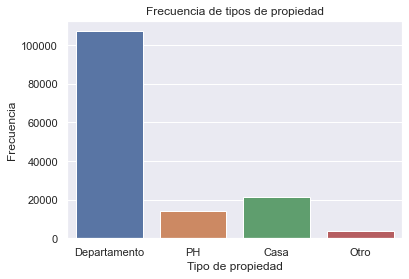

In [8]:
sns.countplot(data_filtro.property_type)
plt.title("Frecuencia de tipos de propiedad")
plt.xlabel("Tipo de propiedad")
plt.ylabel("Frecuencia");
plt.show()

Observamos claramente el desbalanceo que encontramos sobre el dataset, donde en la variable otro ni siquiera llega a aparecer la barra de frecuencia.

### Deteccion y eliminacion de outliers

Decidi realizar la deteccion y eliminacion de outliers ya que en el proyecto 1 vi que hay muchas variables que tienen datos que no son normales o comunes en comparación al resto, por lo tanto capaz estos datos hacen que las predicciones no sean tan acertadas como podrian ser. 

Para ello utilizare la regla de 3 sigmas, crearé una funcion que me determine el maximo y el minimo de la variable en cuestion. Tambien creare una funcion para realizar el filtrado de outliers en el cual recibe los parametros de min y max y automaticamente lo filtra al dataset pasado por parametros. Por ultimo, realice una funcion para observar como quedan los outliers a traves de un boxplot

In [9]:
def tresSigmas(info):
    valor_medio = info.mean()
    std = info.std()
    minimo = valor_medio - 3*std
    maximo = valor_medio + 3*std
    return [minimo, maximo]

In [10]:
def grafico_boxplot(columna,titulo,label):
    sns.boxplot(data=data_filtro, x=columna, palette="Set2")
    plt.suptitle(titulo)
    plt.xlabel(label)
    plt.show()


Copio el dataset en una nueva variable para poder manipularla y tambien seguir teniendo nuestro dataset original

#### Latitud

In [11]:
minimo, maximo =tresSigmas(data_filtro.lat)

Una vez que ya sabemos cual es el maximo y el minimo podemos filtrar por ellos y visualizar como queda nuestra variable sin los outliers

In [12]:
data_filtro = data_filtro[data_filtro.lat < maximo]

In [13]:
data_filtro = data_filtro[data_filtro.lat > minimo]

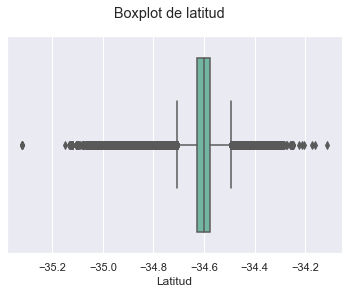

In [14]:
grafico_boxplot('lat','Boxplot de latitud','Latitud')

#### Longitud

In [15]:
minimo, maximo =tresSigmas(data_filtro.lon)
data_filtro = data_filtro[data_filtro.lon < maximo]
data_filtro = data_filtro[data_filtro.lon > minimo]

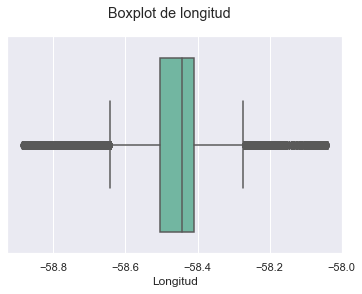

In [16]:
grafico_boxplot('lon','Boxplot de longitud','Longitud')

Vemos que tanto en la variable de longitud y latitud queda mucho bigote, creo que esto se debe a que los valores de estas variables tienen diferencias muy pequeñas entre si.

#### Rooms

In [17]:
minimo, maximo =tresSigmas(data_filtro.rooms)
data_filtro = data_filtro[data_filtro.rooms < maximo]
data_filtro = data_filtro[data_filtro.rooms > minimo]

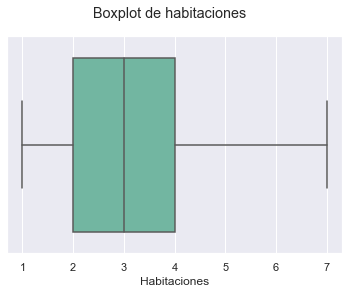

In [18]:
grafico_boxplot('rooms','Boxplot de habitaciones','Habitaciones')

#### Bedrooms

In [19]:
minimo, maximo =tresSigmas(data_filtro.bedrooms)
data_filtro = data_filtro[data_filtro.bedrooms < maximo]
data_filtro = data_filtro[data_filtro.bedrooms > minimo]

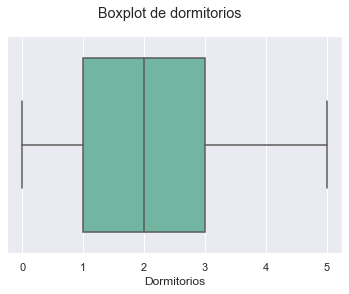

In [20]:
grafico_boxplot('bedrooms','Boxplot de dormitorios','Dormitorios')

Ademas filtraré aquellos que tienen cantidad de dormitorios en 0, ya que se trataría de un error

In [21]:
data_filtro = data_filtro[data_filtro.bedrooms > 0  ]

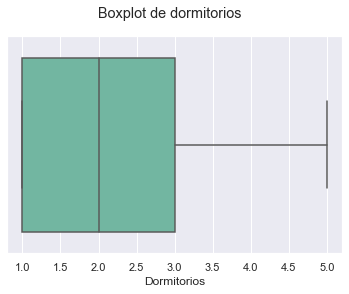

In [22]:
grafico_boxplot('bedrooms','Boxplot de dormitorios','Dormitorios')

#### Bathrooms


In [23]:
minimo, maximo =tresSigmas(data_filtro.bathrooms)
data_filtro = data_filtro[data_filtro.bathrooms < maximo]
data_filtro = data_filtro[data_filtro.bathrooms > minimo]

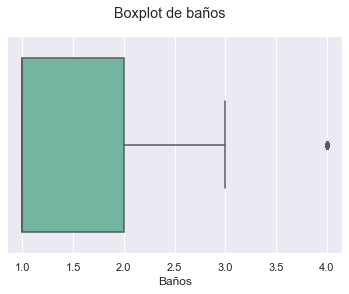

In [24]:
grafico_boxplot('bathrooms','Boxplot de baños','Baños')

#### Superficie total y cubierta

Empiezo filtrando por aquellas que no cumplen con que la superficie total sea mayor o igual a la cubierta

In [25]:
data_filtro[data_filtro.surface_total < data_filtro.surface_covered]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
446,2019-03-04,2019-08-17,2019-03-04,-34.613369,-58.488637,Argentina,Capital Federal,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,USD,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
476,2019-03-04,2019-08-17,2019-03-04,-34.779414,-58.391520,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,4.0,2.0,1.0,148.0,11098.0,129000.0,USD,Casa a refaccionar en bonita zona Temperley,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa,Venta
602,2019-04-25,2019-08-17,2019-04-25,-34.657972,-58.670631,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1.0,1.0,1.0,32.0,33.0,65000.0,USD,OPORTUNIDAD Venta Monoambiente Ituzaingo Centro,Corredor Responsable: Hernan Perrone - CMCPDJM...,Departamento,Venta
783,2019-04-25,2019-08-17,2019-04-25,-34.334050,-58.796940,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,3.0,2.0,1.0,33.0,187.0,115000.0,USD,Oportunidad! Casa de 3 Amb en Belen de Escobar,Corredor Responsable: MAURO MARVISI - CSI 5574...,Casa,Venta
785,2019-04-25,2019-08-17,2019-04-25,-34.681012,-58.375710,Argentina,Bs.As. G.B.A. Zona Sur,Avellaneda,3.0,2.0,2.0,159.0,179.0,197000.0,USD,"VENTA CASA AL FRENTE 3 AMB C/GARAGE, PATIO, TE...",Corredor Responsable: ANDREA VAZQUEZ - CSI 625...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145293,2020-01-15,2020-02-07,2020-01-15,-34.763600,-58.405368,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,3.0,2.0,2.0,72.0,73.0,185000.0,USD,"DEPARTAMENTO EN LAS LOMITAS, CON SUM, GYM Y SAUNA",Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Departamento,Venta
145347,2020-01-15,9999-12-31,2020-01-15,-34.648990,-58.603563,Argentina,Bs.As. G.B.A. Zona Oeste,Morón,5.0,3.0,1.0,134.0,160.0,210000.0,USD,Casa en venta HAEDO SUR 5 ambientes GARAGE,Corredor Responsable: GRACIELA MENAZZI - CMCPD...,Casa,Venta
145376,2020-01-15,2020-02-05,2020-01-15,-34.650700,-58.385906,Argentina,Capital Federal,Barracas,6.0,4.0,2.0,197.0,290.0,329900.0,USD,CASA 6 AMBIENTES LOTE PROPIO BARRACAS,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta
145383,2020-01-15,2020-02-05,2020-01-15,-34.647387,-58.388259,Argentina,Capital Federal,Barracas,7.0,5.0,1.0,124.0,170.0,99000.0,USD,Excelente OP/ Casa lote propio a refaccionar !!,Corredor Responsable: GUILLERMO FRIMET - CUCIC...,Casa,Venta


Estos valores son incorrectos, la superficie cubierta no puede ser mayor a la total, por lo tanto eliminare estos inmubles.

In [26]:
data_filtro= data_filtro[data_filtro.surface_total > data_filtro.surface_covered]

##### Superficie total:

In [27]:
minimo, maximo =tresSigmas(data_filtro.surface_total)
data_filtro = data_filtro[data_filtro.surface_total < maximo]
data_filtro = data_filtro[data_filtro.surface_total > minimo]

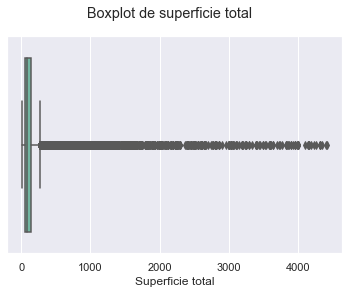

In [28]:
grafico_boxplot('surface_total','Boxplot de superficie total','Superficie total')

##### Superficie cubierta:

In [29]:
minimo, maximo =tresSigmas(data_filtro.surface_covered)
data_filtro = data_filtro[data_filtro.surface_covered < maximo]
data_filtro = data_filtro[data_filtro.surface_covered > minimo]

In [30]:
data_filtro =data_filtro[data_filtro.surface_covered < 300]

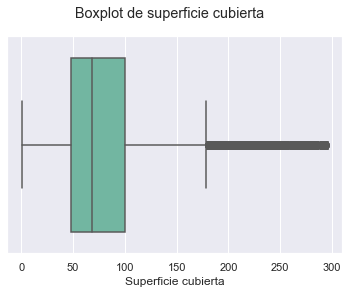

In [31]:
grafico_boxplot('surface_covered','Boxplot de superficie cubierta','Superficie cubierta')

#### Precio

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

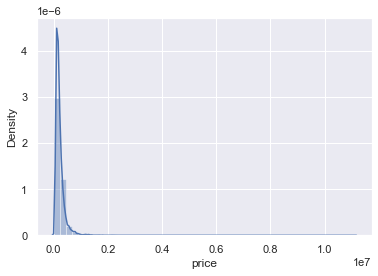

In [32]:
sns.distplot(data_filtro.price)

Con el grafico anterior observamos que hay valores muy variados del precio

In [33]:
minimo, maximo =tresSigmas(data_filtro.price)
data_filtro = data_filtro[data_filtro.price < maximo]
data_filtro = data_filtro[data_filtro.price > minimo]

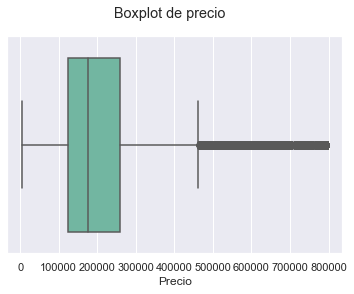

In [34]:
grafico_boxplot('price','Boxplot de precio','Precio')

### Encoding

Creo que es necesario realizar encoding ya que hay datos categoricos que son importantes y si no realizamos encoding no podremos utilizarlo en nuestro modelo, perdiendo información valiosa. Analizaré a continuación que variables categoricas valen la pena realizar enconding y cuales no. 

En el caso de la variable categorica tipo de propiedad, al ser nuestro target, no la modificare.

Otras variables categoricas que tenemos es "operation_type", "currency", "title" y "description", vamos a ver que valores toma cada uno:

In [36]:
data['operation_type'].value_counts()

Venta    146660
Name: operation_type, dtype: int64

In [37]:
data['currency'].value_counts()

USD    146660
Name: currency, dtype: int64

Como vemos que "operation_type" toma siempre valor "Venta" y "currency" toma siempre el valor "USD" podemos eliminar estas dos columnas del data set ya que no nos aporta ninguna información

In [38]:
data_filtro = data_filtro.drop(columns = ['operation_type','currency'])
data_filtro

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,description,property_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",PH
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,Villa Pueyrredón PH 2 ambientes con 2 terrazas...,PH CON TERRAZAS PROPIAS EN DUPLEX MUY LUMINOSO...,PH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146644,2019-07-31,2019-08-14,2019-07-31,-34.445077,-58.621163,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,97.0,80.0,260000.0,Departamento en venta en Santa Barbara; Terrazas,OPORTUNIDAD! Departamento en venta en el Barri...,Departamento
146645,2019-07-31,2019-08-14,2019-07-31,-34.446847,-58.632600,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,90.0,80.0,250000.0,DEPARTAMENTO EN VENTA EN SANTA BARBARA,Departamento en venta en Complejo Terrazas del...,Departamento
146646,2019-07-31,2019-09-04,2019-07-31,-34.444630,-58.620901,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,96.0,83.0,280000.0,VENTA departamento en Terrazas de Santa Bárbara.,Venta de departamento de 2 dormitorios en el c...,Departamento
146654,2019-07-31,2019-11-02,2019-07-31,-34.602389,-58.591058,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,2.0,161.0,80.0,200000.0,Los Geranio al 6200 Venta Depto cochera terraz...,Único departamento Amplio balcón terraza 76 m2...,Departamento


Si bien ya podemos leer las columnas 'title' y 'description' no creo que nos brinde información util ya que en general se componen de la informacion 'tipo de propiedad' en venta 'alguna caracteristica buena'. Por lo tanto las eliminare

In [39]:
data_filtro = data_filtro.drop(columns = ['title','description'])
data_filtro

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146644,2019-07-31,2019-08-14,2019-07-31,-34.445077,-58.621163,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,97.0,80.0,260000.0,Departamento
146645,2019-07-31,2019-08-14,2019-07-31,-34.446847,-58.632600,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,90.0,80.0,250000.0,Departamento
146646,2019-07-31,2019-09-04,2019-07-31,-34.444630,-58.620901,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,96.0,83.0,280000.0,Departamento
146654,2019-07-31,2019-11-02,2019-07-31,-34.602389,-58.591058,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,2.0,161.0,80.0,200000.0,Departamento


En tanto a las variables categoricas l1, l2 y l3, las trabajaré mas adelante junto con la latitud y longitud

### Imputación de valores faltantes

In [40]:
datosNull = data_filtro.isna().sum()
datosNull

start_date         0
end_date           0
created_on         0
lat                0
lon                0
l1                 0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

Los valores nulos han sido eliminados con los outliers

### Escalado de datos

Utilizaré escalado ya que hay mucha diferencia en las unidades, es decir, no es lo mismo una unidad en baños que una unidad en superficie o precio, por lo tanto para que nuestro modelo no sea suceptible a esto, realizaré escalado de datos.

In [41]:
data_filtro

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,2019-10-17,2019-12-23,2019-10-17,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,2019-10-17,2019-12-07,2019-10-17,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146644,2019-07-31,2019-08-14,2019-07-31,-34.445077,-58.621163,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,97.0,80.0,260000.0,Departamento
146645,2019-07-31,2019-08-14,2019-07-31,-34.446847,-58.632600,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,90.0,80.0,250000.0,Departamento
146646,2019-07-31,2019-09-04,2019-07-31,-34.444630,-58.620901,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,96.0,83.0,280000.0,Departamento
146654,2019-07-31,2019-11-02,2019-07-31,-34.602389,-58.591058,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,2.0,161.0,80.0,200000.0,Departamento


Para empezar voy a eliminar las columnas de fechas ya que por el momento no las voy a utilizar

In [42]:
data_filtro = data_filtro.drop(columns = ["start_date","end_date","created_on"])

In [43]:
data_filtro

,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
3,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
8,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
9,-34.639598,-58.419612,Argentina,Capital Federal,Parque Patricios,1.0,1.0,1.0,45.0,37.0,89000.0,PH
10,-34.586225,-58.496220,Argentina,Capital Federal,Villa Pueyrredón,2.0,1.0,2.0,66.0,49.0,170000.0,PH
...,...,...,...,...,...,...,...,...,...,...,...,...
146644,-34.445077,-58.621163,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,97.0,80.0,260000.0,Departamento
146645,-34.446847,-58.632600,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,90.0,80.0,250000.0,Departamento
146646,-34.444630,-58.620901,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,96.0,83.0,280000.0,Departamento
146654,-34.602389,-58.591058,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,3.0,2.0,2.0,161.0,80.0,200000.0,Departamento


Tambien voy a eliminar las columnas l1 l2 y l3 que quedan representadas por la latitud y longitud

In [44]:
data_filtro = data_filtro.drop(columns = ["l1","l2","l3"])

Creare una funcion para utilizar standardscaler y que sea mas rapido escalar todos los datos, ya que tengo que hacer lo mismo para cada uno. Cabe destacar que esta funcion solo sirve para este dataset en esta instacia, ya que estamos usando la variable "data_filtro" haciendo que la funcion no sea reutilizable para otro dataset

In [45]:
def escalador(columna):
    scaler = StandardScaler()
    scaler.fit(data_filtro[columna].values.reshape(-1, 1))
    data_filtro[columna] = scaler.transform(data_filtro[columna].values.reshape(-1, 1))

In [46]:
escalador('lat')
escalador('lon')
escalador('rooms')
escalador('bedrooms')
escalador('bathrooms')
escalador('surface_total')
escalador('surface_covered')
escalador('price')

In [47]:
data_filtro

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,-0.402291,0.586008,-0.921236,-1.102087,0.658314,-0.314677,-0.494211,-0.405704,PH
3,0.107808,0.357136,-0.921236,-1.102087,-0.729175,-0.243867,-0.659907,0.665048,PH
8,-0.587700,0.516339,-1.799837,-1.102087,-0.729175,-0.432693,-0.929163,-0.956827,PH
9,-0.587700,0.516339,-1.799837,-1.102087,-0.729175,-0.432693,-0.929163,-0.956827,PH
10,0.048986,-0.195130,-0.921236,-1.102087,0.658314,-0.333559,-0.680619,-0.319099,PH
...,...,...,...,...,...,...,...,...,...
146644,1.732729,-1.355503,-0.042634,-0.025093,0.658314,-0.187219,-0.038548,0.389487,Departamento
146645,1.711621,-1.461719,-0.042634,-0.025093,0.658314,-0.220264,-0.038548,0.310755,Departamento
146646,1.738059,-1.353071,-0.042634,-0.025093,0.658314,-0.191940,0.023588,0.546950,Departamento
146654,-0.143830,-1.075911,-0.042634,-0.025093,0.658314,0.114902,-0.038548,-0.082904,Departamento


## Modelado

#### Nuevas fuentes de informacion: 

Ahora que tenemos nuestro dataset un poco mas limpio voy a implementar distintas tecnicas para el manejo de datos desbalanceados que encontre en las siguientes fuentes: 
* https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/
* https://machinelearningparatodos.com/tratamiento-de-clases-desbalanceadas/<br>
<br>Ademas utilizare las metricas de:
* accuracy
* precision    
* recall
* f1-score 
* matriz de confusion <br>
<br>Estas metricas las elegi porque en conjunto se complementan y ayudan a tener una mejor vision en un dataset desbalanceado

In [48]:
def confusion(ytest,y_pred):
    names=["Casa","Departamento","Otro","PH"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.setp(plt.xticks()[1], rotation=60)
    plt.setp(plt.yticks()[1], rotation=0)
    plt.show()

    return

In [50]:
data_sample = data_filtro.copy()

In [51]:
X = data_sample.drop(columns = ['property_type'])
y = data_sample['property_type']

Desarrollare 2 modelos, XGBoost y regresion logistica sin ninguna estrategia, sobre el que me de mejores resultados continuare desarrollando las demas estrategias.

### XGBoost - sin estrategia

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(51947, 8) (51947,) (22263, 8) (22263,)


In [53]:
xg_classifier = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [54]:
xg_classifier.fit(X_train, y_train)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
y_train_pred = xg_classifier.predict(X_train)
y_test_pred = xg_classifier.predict(X_test)

In [56]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.88      0.65      0.75      2933
Departamento       0.83      1.00      0.91     16759
        Otro       0.00      0.00      0.00       100
          PH       0.91      0.02      0.03      2471

    accuracy                           0.84     22263
   macro avg       0.66      0.42      0.42     22263
weighted avg       0.84      0.84      0.79     22263



C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


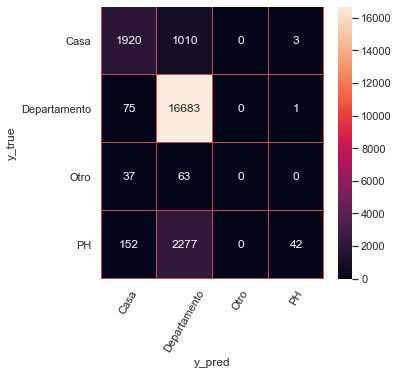

In [57]:
confusion(y_test,y_test_pred)

Si bien para casa y departamento las metricas son bastante buenas, como era de esperarse para PH y otro son muy malas

### Regrasion logistica - sin estrategia

In [58]:
clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
clf_base.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

In [59]:
y_train_pred = clf_base.predict(X_train)
y_test_pred = clf_base.predict(X_test)

In [60]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.79      0.79      0.79      2933
Departamento       0.88      0.98      0.93     16759
        Otro       0.17      0.01      0.02       100
          PH       0.48      0.13      0.20      2471

    accuracy                           0.86     22263
   macro avg       0.58      0.48      0.48     22263
weighted avg       0.82      0.86      0.83     22263



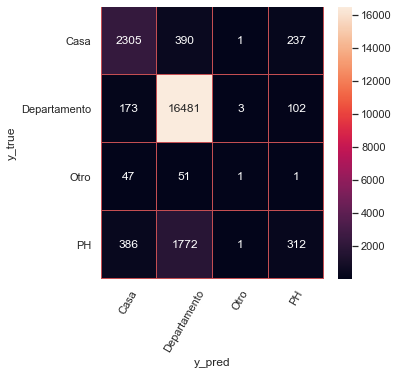

In [61]:
confusion(y_test,y_test_pred)

Con este modelo se mejora el valor de los obtenidos correctamente para PH, teniendo mejores resultados que XGBoost, por lo tanto seguire con este modelo. 

### Regresion logistica - penalizacion

In [62]:
clf_penalizacion = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
clf_penalizacion.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

In [63]:
y_train_pred = clf_penalizacion.predict(X_train)
y_test_pred = clf_penalizacion.predict(X_test)

In [64]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.78      0.62      0.69      2933
Departamento       0.95      0.81      0.88     16759
        Otro       0.03      0.39      0.05       100
          PH       0.32      0.55      0.41      2471

    accuracy                           0.76     22263
   macro avg       0.52      0.59      0.51     22263
weighted avg       0.85      0.76      0.80     22263



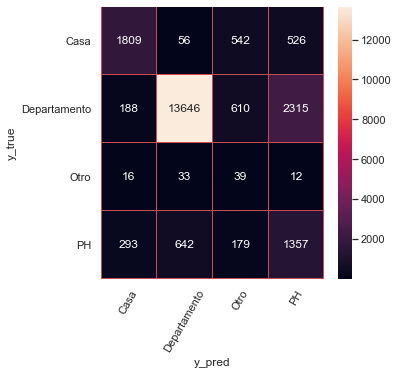

In [65]:
confusion(y_test,y_test_pred)

Si bien vemos que el accuracy baja, las otras metricas son mejores. Ahora esta detectando al menos 1 caso de la categoria otro, que es la mas dificil de detectar ya que son menos registros. Tambien aumenta la cantidad de casos detectados correctamente como PH. 

### Regresion logistica - subsampling en la clase mayoritaria

In [66]:
us = NearMiss()
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))



Distribution before resampling Counter({'Departamento': 38863, 'Casa': 7002, 'PH': 5845, 'Otro': 237})
Distribution after resampling Counter({'Casa': 237, 'Departamento': 237, 'Otro': 237, 'PH': 237})


In [67]:
clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
clf_base.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1, solver='newton-cg')

In [68]:
y_train_pred = clf_base.predict(X_train_res)
y_test_pred = clf_base.predict(X_test)

In [69]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.19      0.43      0.26      2933
Departamento       0.97      0.27      0.42     16759
        Otro       0.01      0.46      0.02       100
          PH       0.15      0.43      0.22      2471

    accuracy                           0.31     22263
   macro avg       0.33      0.40      0.23     22263
weighted avg       0.77      0.31      0.38     22263



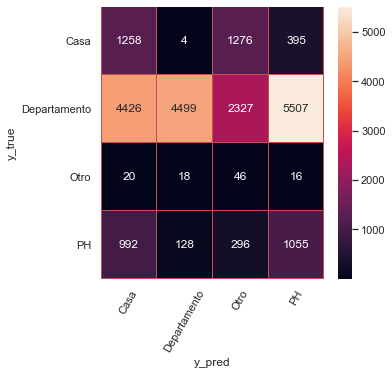

In [70]:
confusion(y_test,y_test_pred)

Como nos encontramos con muy pocos registros de Otro, todos pasan a tener solo 13 registros, lo que es muy poco para poder entrenar un modelo. No considero esta una buena opcion.

### Regresion logista - Oversampling de la clase minoritaria

In [71]:
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({'Departamento': 38863, 'Casa': 7002, 'PH': 5845, 'Otro': 237})
Distribution labels after resampling Counter({'Departamento': 38863, 'PH': 38863, 'Casa': 38863, 'Otro': 38863})


In [72]:
clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
clf_base.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1, solver='newton-cg')

In [73]:
y_train_pred = clf_base.predict(X_train_res)
y_test_pred = clf_base.predict(X_test)

In [74]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.79      0.61      0.69      2933
Departamento       0.95      0.82      0.88     16759
        Otro       0.03      0.37      0.05       100
          PH       0.32      0.55      0.40      2471

    accuracy                           0.76     22263
   macro avg       0.52      0.59      0.51     22263
weighted avg       0.85      0.76      0.80     22263



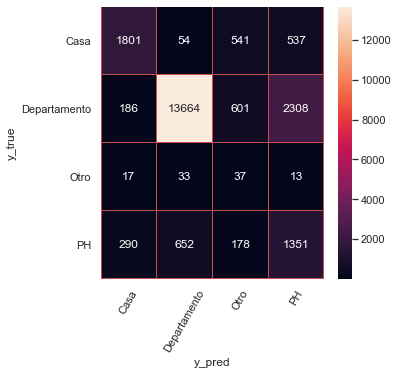

In [75]:
confusion(y_test,y_test_pred)

Mejora muchisimo los resultados de este modelo. En lo personal pense que no iba a funcionar, ya que solo esta repitiendo informacion.

### Regresion logistica - resampling con smote-tomek

In [76]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))

Distribution before resampling Counter({'Departamento': 38863, 'Casa': 7002, 'PH': 5845, 'Otro': 237})
Distribution after resampling Counter({'Otro': 38854, 'Casa': 38760, 'Departamento': 38684, 'PH': 38672})


In [77]:
clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
clf_base.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1, solver='newton-cg')

In [78]:
y_train_pred = clf_base.predict(X_train_res)
y_test_pred = clf_base.predict(X_test)

In [79]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.78      0.63      0.70      2933
Departamento       0.95      0.80      0.87     16759
        Otro       0.03      0.40      0.05       100
          PH       0.31      0.54      0.40      2471

    accuracy                           0.75     22263
   macro avg       0.52      0.59      0.50     22263
weighted avg       0.85      0.75      0.79     22263



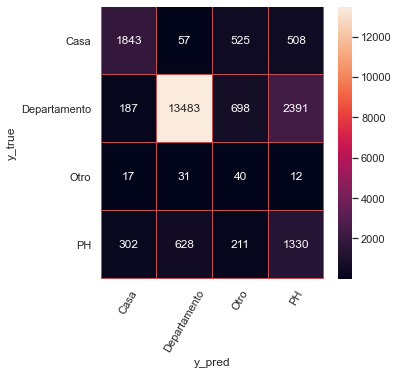

In [80]:
confusion(y_test,y_test_pred)

En este modelo observamos una pequeña mejoria con respecto al anterior. Obtenemos mucho mejores resultados que los obtenidos sin ninguna estrategia

### Ensamble de modelos con balanceo

In [81]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train)

BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          random_state=0)

In [82]:
y_train_pred = clf_base.predict(X_train_res)
y_test_pred = clf_base.predict(X_test)

In [83]:
print('Metricas en test:','\n',classification_report(y_test,y_test_pred))

Metricas en test: 
               precision    recall  f1-score   support

        Casa       0.78      0.63      0.70      2933
Departamento       0.95      0.80      0.87     16759
        Otro       0.03      0.40      0.05       100
          PH       0.31      0.54      0.40      2471

    accuracy                           0.75     22263
   macro avg       0.52      0.59      0.50     22263
weighted avg       0.85      0.75      0.79     22263



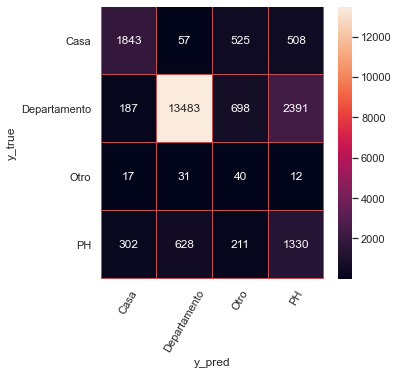

In [84]:
confusion(y_test,y_test_pred)

### Eleccion de estrategia

Resumiendo tenemos que:
* Penalizacion:  
    * Precision - Otro: 0.03
    * Recall - Otro: 0.39
    * F1score - Otro: 0.05
    * Precision - PH: 0.32
    * Recall - PH: 0.55
    * F1score - PH: 0.41
* Subsampling: 
    * Precision - Otro: 0.01
    * Recall - Otro: 0.46
    * F1score - Otro: 0.02
    * Precision - PH:  0.15
    * Recall - PH: 0.43
    * F1score - PH: 0.22
* Oversamplig:
    * Precision - Otro: 0.03
    * Recall - Otro: 0.37
    * F1score - Otro: 0.05
    * Precision - PH: 0.32
    * Recall - PH: 0.55
    * F1score - PH: 0.40
* Smote tomek: 
    * Precision - Otro: 0.03
    * Recall - Otro: 0.40
    * F1score - Otro: 0.05
    * Precision - PH: 0.31
    * Recall - PH: 0.54
    * F1score - PH: 0.40
* Ensamble: 
    * Precision - Otro: 0.03
    * Recall - Otro: 0.40
    * F1score - Otro: 0.05
    * Precision - PH: 0.31
    * Recall - PH: 0.54
    * F1score - PH: 0.40   
        

Luego de analizar los resultados de las estrategias implementadas podemos decir que por poca diferencia la mejor estrategia es la penalizacion, seguida de el oversampling. Tiene muy buenos resultados con respecto a el modelo sin ninguna estrategia y si bien nos encontramos con datos que no son tan altos, considero que son buenos. Quizas incrementado la cantidad de muestras elegidas las metricas aumentarian.

## Conclusion final

Al inicio del proyecto me plantee trabajar con un dataset desbalanceado para ir sumergiendome en datasets un poco mas reales, sabiendo que es muy recurrente encontrarte con este tipo de dataset. Al principio no encontre mucha informacion, simplemente encontre que habia que utilizar distintas metricas y no recaer solo en el accuracy ya que puede dar datos incorrectos. Lo cual es cierto y me fue de importancia para encontrar otras metricas, pero no estaba encontrando como solucionar el problema, que tecnicas habia para poder contrarrestar ese desbalanceo. <br>
Luego de buscar por un tiempo, me encontre con 2 paginas (se encuentran mas arriba en el proyecto) que me fueron de suma ayuda, no solo me contaba cuales eran las tecnicas que se podian usar, sino que tambien las implemento, mostrandome codigo util para poder desarrollar mi proyecto. Si bien hubo algunas partes del codigo que me generaban error, pude buscar la solucion bastante rapido googleando. Finalmente contaba con 5 estrategias distintas, que no conocia, para enfrentarme a un dataset desbalanceado. <br>
En cuanto a este trabajo en particular me gusto porque era bastante libre y estaba dirigido a investigar, lo que se hace diariamente en el rubro IT. Me llevo nuevos conocimientos y me queda pendiente seguir buscando modelos que me ayuden a trabajar con datasets desbalancedos. <br>
En tanto a la carrera de DS, me llevo muchisimos conocimientos nuevos y formas de trabajo mas incorporadas. Como por ejemplo, si se genera un error en el codigo, googlear, buscar en las paginas mas conocidas, alguien mas ya tuvo el mismo problema. Me llevo como tarea desp del curso, seguir investigando sobre nuevos modelos, nuevas formas de tratar a los datos, de mejorar los modelos que ya conozco y seguir leyendo mucho que es una ciencia en pleno auge. 